<a href="https://colab.research.google.com/github/sudo-KingJahad/finalterm-machine-learning/blob/main/Fish_Image_Detection%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight


In [8]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
DATASET_PATH_TRAIN= "/content/drive/MyDrive/FishImg Dataset/train"  # ganti sesuai folder kamu
DATASET_PATH_VAL= "/content/drive/MyDrive/FishImg Dataset/val"  # ganti sesuai folder kamu


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH_TRAIN,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    DATASET_PATH_VAL,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 7055 images belonging to 31 classes.
Found 539 images belonging to 31 classes.


In [10]:
labels = train_generator.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)


Class Weights: {0: np.float64(1.6611725924181775), 1: np.float64(1.4135443798837908), 2: np.float64(1.4223790322580645), 3: np.float64(0.9030977982590885), 4: np.float64(1.8654151242728716), 5: np.float64(1.4874551971326164), 6: np.float64(1.0487587334621673), 7: np.float64(0.7156624061675796), 8: np.float64(0.4682729324306385), 9: np.float64(1.3792766373411536), 10: np.float64(0.9139784946236559), 11: np.float64(0.23270004617718848), 12: np.float64(2.5861436950146626), 13: np.float64(1.0837173579109063), 14: np.float64(1.5273868802771162), 15: np.float64(1.236851332398317), 16: np.float64(0.9938019439357656), 17: np.float64(0.8889868951612904), 18: np.float64(1.11014948859166), 19: np.float64(1.1155913978494623), 20: np.float64(1.4972410865874364), 21: np.float64(1.6255760368663594), 22: np.float64(1.4682622268470344), 23: np.float64(0.9684282772820865), 24: np.float64(1.835327783558793), 25: np.float64(0.8620478983382209), 26: np.float64(1.1915217024151326), 27: np.float64(1.00255790

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,172,959 (42.62 MB)

 Trainable params: 11,172,959 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    class_weight=class_weight_dict
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 2754s 12s/step - accuracy: 0.0425 - loss: 3.5574 - val_accuracy: 0.0705 - val_loss: 3.3478
Epoch 2/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 129s 584ms/step - accuracy: 0.0887 - loss: 3.2569 - val_accuracy: 0.1336 - val_loss: 3.1034
Epoch 3/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 129s 583ms/step - accuracy: 0.1345 - loss: 3.0528 - val_accuracy: 0.1837 - val_loss: 3.0066
Epoch 4/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 133s 604ms/step - accuracy: 0.1666 - loss: 2.9282 - val_accuracy: 0.1763 - val_loss: 2.9168
Epoch 5/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 128s 581ms/step - accuracy: 0.2057 - loss: 2.7386 - val_accuracy: 0.2356 - val_loss: 2.7231
Epoch 6/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 129s 581ms/step - accuracy: 0.2353 - loss: 2.6246 - val_accuracy: 0.2486 - val_loss: 2.6656
Epoch 7/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 133s 600ms/step - accuracy: 0.2576 - loss: 2.4953 - val_accuracy: 0.2968 - val_loss: 2.4996
Epoch 8/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 128s 580ms/step - accuracy: 0.2891 - 

In [14]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.2f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.3889 - loss: 2.2156
Validation Accuracy: 0.37


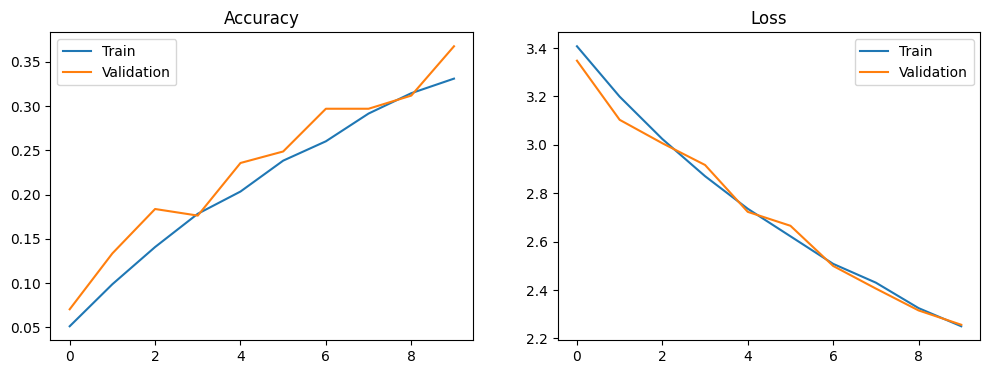

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


(np.float64(-0.5), np.float64(221.5), np.float64(221.5), np.float64(-0.5))

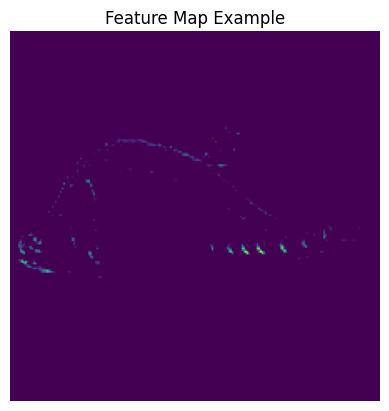

In [17]:
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = tf.keras.Model(inputs=model.layers[0].input, outputs=layer_outputs)

img_batch, _ = next(val_generator)
activations = activation_model.predict(img_batch)

plt.imshow(activations[0][0,:,:,0], cmap='viridis')
plt.title("Feature Map Example")
plt.axis('off')

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

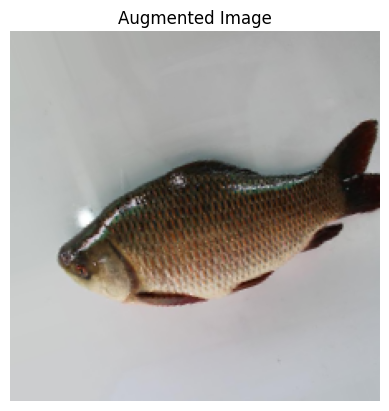

In [18]:
img, label = next(train_generator)
plt.imshow(img[0])
plt.title("Augmented Image")
plt.axis('off')


In [19]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model_tl = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
model_tl.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)

print(classification_report(y_true, y_pred))


17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 360ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       1.00      0.08      0.15        12
           2       0.00      0.00      0.00        12
           3       0.05      0.05      0.05        19
           4       0.00      0.00      0.00         9
           5       0.08      0.08      0.08        12
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        24
           8       0.11      0.11      0.11        37
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00        19
          11       0.13      0.07      0.09        75
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00        16
          14       0.00      0.00      0.00        11
          15       0.05      0.07      0.06        14
          16       0.00      0.00      0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


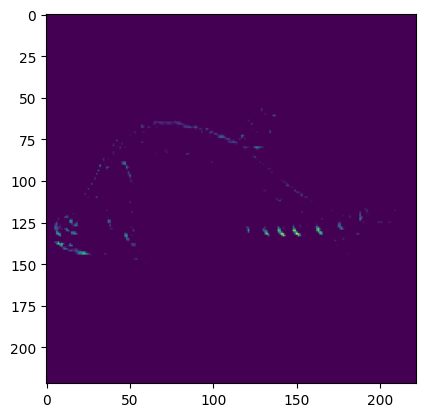

In [23]:
activations = activation_model.predict(img_batch)
plt.imshow(activations[0][0,:,:,0])

In [33]:
model.save('my_fish_model.keras')
print("Model saved to my_fish_model.keras")

Model saved to my_fish_model.keras


In [24]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/FishImg Dataset/my_fish_model.keras")

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = 224

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return img

In [34]:
# class_names = [
#     "Salmon",
#     "Tuna",
#     "Tilapia",
#     "Catfish",
#     "Goldfish"
# ]

class_names_map = train_generator.class_indices
class_names = [None] * train_generator.num_classes
for class_name, index in class_names_map.items():
    class_names[index] = class_name
print(f"Generated {len(class_names)} class names.")
print(f"First 5 class names: {class_names[:5]}")

Generated 31 class names.
First 5 class names: ['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch']


In [35]:
def detect_fish(img_path):
    img = preprocess_image(img_path)
    img_input = np.expand_dims(img, axis=0)

    predictions = model.predict(img_input)
    class_index = np.argmax(predictions)
    confidence = np.max(predictions)

    predicted_class = class_names[class_index]

    plt.imshow(img)
    plt.title(f"Detected Fish: {predicted_class}\nConfidence: {confidence:.2f}")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


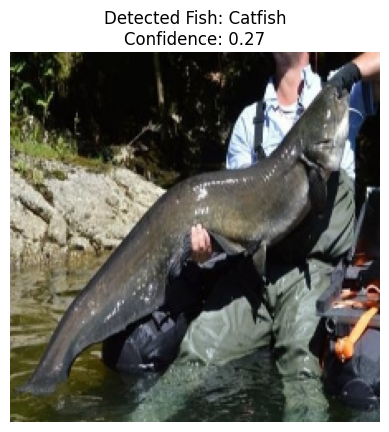

In [42]:
detect_fish("/content/drive/MyDrive/FishImg Dataset/test/Catfish/05e2248b-dc0d-4c3d-b019-c0e8e649a788-0mm.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


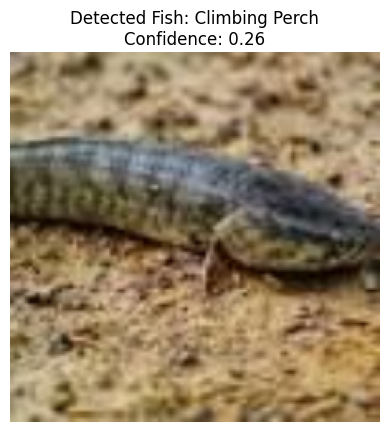

In [41]:
detect_fish("/content/drive/MyDrive/FishImg Dataset/test/Snakehead/SnakeHead 01.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


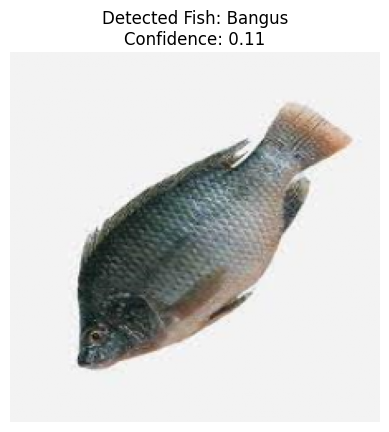

In [39]:
detect_fish("/content/drive/MyDrive/FishImg Dataset/test/Tilapia/Picture101.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


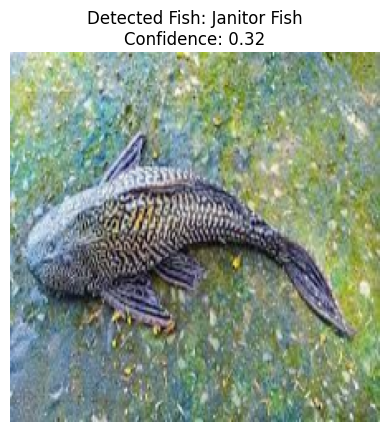

In [38]:
detect_fish("/content/drive/MyDrive/FishImg Dataset/test/Janitor Fish/Picture453.jpg")